## 3.0 Performance Evaluation

If we use the same data to develop the model and asses its performance, we introduce **bias**.

The "best" model can indeed have a superior performance, but the risk are that the aspects of the data happen to match the chosen model better than other models. This phenomenal is called overfitting. It means that the model is fitting the systematic **and** the noise part of the series. Therefore, it's unlikely to have a good performance on new unseen data.

### 3.1 Data Partitioning

To tackle overfitting, we can split the data set in, usually, 2 (or 3) disjoint subsets that we'll discuss here.

#### 3.1.1 Cross-Sectional Data

The data is randomly splitted in tree disjoint datasets.

   * training: data used to develop the models.
   * validation: data used to assess the performance of each model, hyperparameter tuning and pick the best one.
   * test: assess the performance of the chosen model with new data.

#### 3.1.2 Temporal Data

The data is **sequentially** splitted in two disjoint datasets.

   * training: data used to develop the models.
   * validation: data used to assess the performance of each model, hyperparameter tuning and pick the best one.

    In the case of temporal data, the test set tends to cause more harm than benefit.

#### 3.1.3 Joining Partitions for Forecasting

After the validation and the choosing of the best model. It's a common practice to rebuild the model using the whole data. The benefits of recombining are:

   * The validation data contains the most recent and (usually) the most valuable data.
   * With more data, some models performs better.
   * If only the training data is used, it's required to predict even more values in the future.

#### 3.1.4 Choosing the Validation Period

The main practice is to choose an evaluation period that mimics the forecast horizon.

### Example with Amtrak dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../data/AmtrakPassengersMonthly T-Competition.xls', sheet_name='Data')
df.drop('Amtrak Ridership Number of Passengers ( in thousands)', axis=1, inplace=True)

## Plot the dataset

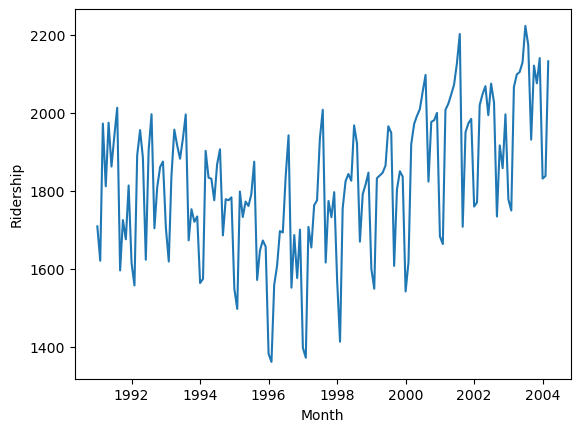

In [3]:
sns.lineplot(x='Month', y='Ridership', data=df)
plt.show()

In [5]:
def naive(series, h=1):
    num = series.iloc[-1]
    return [num]*h

In [7]:
num_valid = 36
num_train = df.shape[0] - num_valid
steps_ahead = 1
error = [0]*(num_valid - steps_ahead + 1)
percent_error = [0]*(num_valid - steps_ahead + 1)
predicted = []
for j in range(num_train, num_train + num_valid - steps_ahead + 1, 1):
    df_train = df.iloc[:j]
    df_valid = df.iloc[j:j+steps_ahead]

    naive_pred = naive(df_train['Ridership'], h=steps_ahead)
    predicted.append([df_valid['Month'].iloc[0], np.mean(naive_pred)])
    
    error[j - num_train] = np.mean(df_valid['Ridership'].iloc[:steps_ahead]-naive_pred)
    percent_error[j - num_train] = error[j - num_train]/df_valid['Ridership'].iloc[:steps_ahead]
    #break;
np.mean(np.abs(error)), np.sqrt(np.mean(np.power(error,2))), np.mean(np.abs(percent_error))*100

(119.42888888888888, 169.17326606306457, 6.206066097504474)

In [12]:
!pip install darts

In [15]:
!pip freeze search grep

anyio==3.3.0
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037869401/work
arrow==1.1.1
astroid==2.7.2
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
Babel==2.9.1
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
beautifulsoup4==4.9.3
binaryornot==0.4.4
bleach @ file:///tmp/build/80754af9/bleach_1628110601003/work
Bottleneck @ file:///C:/ci/bottleneck_1607557040328/work
bs4==0.0.1
certifi==2021.5.30
cffi @ file:///C:/ci/cffi_1625831756778/work
chardet==4.0.0
charset-normalizer==2.0.4
click==8.0.1
colorama @ file:///tmp/build/80754af9/colorama_1607707115595/work
cookiecutter==1.7.3
cycler==0.10.0
daal4py==2021.3.0
DARTS==0.0.1.post1
decorator @ file:///tmp/build/80754af9/decorator_1621259047763/work
defusedxml @ file:///tmp/build/80754af9/defusedxml_1615228127516/work
entrypoints==0.3
filelock==3.0.12
finta==1.3
fonttools==4.25.0
gdown==3.13.0
idna==3.2
imageio==2.9.0
importlib-meta

In [19]:
from DARTS.darts import back_to_original_4_pred.

ImportError: cannot import name 'TimeSeries' from 'DARTS.darts' (C:\anaconda3\envs\ds\lib\site-packages\DARTS\darts.py)

In [9]:
from darts.models.baselines import NaiveSeasonal

ModuleNotFoundError: No module named 'darts'

In [180]:
percent_error

[124    0.011341
 Name: Ridership, dtype: float64,
 125    0.012497
 Name: Ridership, dtype: float64,
 126    0.025299
 Name: Ridership, dtype: float64,
 127    0.034468
 Name: Ridership, dtype: float64,
 128   -0.289833
 Name: Ridership, dtype: float64,
 129    0.124581
 Name: Ridership, dtype: float64,
 130    0.011602
 Name: Ridership, dtype: float64,
 131    0.0056
 Name: Ridership, dtype: float64,
 132   -0.127925
 Name: Ridership, dtype: float64,
 133    0.006193
 Name: Ridership, dtype: float64,
 134    0.12343
 Name: Ridership, dtype: float64,
 135    0.013906
 Name: Ridership, dtype: float64,
 136    0.009844
 Name: Ridership, dtype: float64,
 137   -0.037355
 Name: Ridership, dtype: float64,
 138    0.039027
 Name: Ridership, dtype: float64,
 139   -0.02403
 Name: Ridership, dtype: float64,
 140   -0.168615
 Name: Ridership, dtype: float64,
 141    0.095273
 Name: Ridership, dtype: float64,
 142   -0.03144
 Name: Ridership, dtype: float64,
 143    0.06913
 Name: Ridership, dt

In [159]:
df_predicted = pd.DataFrame(predicted).rename(columns={0:'Month', 1:'Ridership'})

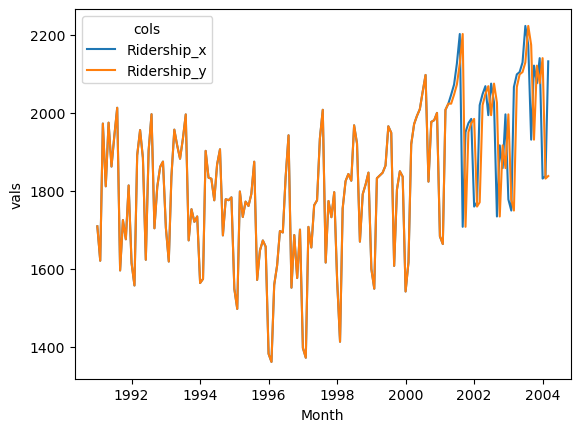

In [173]:
df_final = pd.merge(df, df_predicted, how='left', on='Month')
df_final['Ridership_y'] = df_final.apply(lambda x: x['Ridership_x'] if pd.isnull(x['Ridership_y']) else x['Ridership_y'], axis=1)

df_final = df_final.melt('Month', var_name='cols',  value_name='vals')
g = sns.lineplot(x="Month", y="vals", hue='cols', data=df_final)
plt.show()

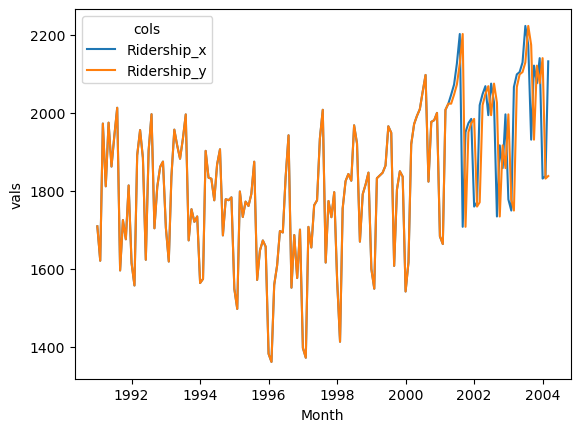

In [170]:
df_final

,Month,Ridership_x,Ridership_y
0,1991-01-01,1708.917,1708.917
1,1991-02-01,1620.586,1620.586
2,1991-03-01,1972.715,1972.715
3,1991-04-01,1811.665,1811.665
4,1991-05-01,1974.964,1974.964
...,...,...,...
154,2003-11-01,2076.054,2121.470
155,2003-12-01,2140.677,2076.054
156,2004-01-01,1831.508,2140.677
157,2004-02-01,1838.006,1831.508


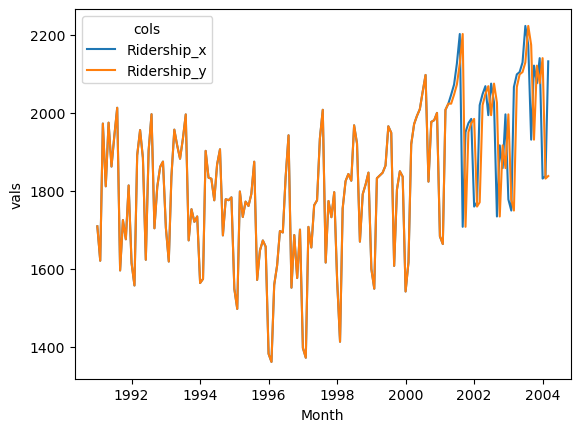

In [156]:
df_final = df_final.melt('Month', var_name='cols',  value_name='vals')
g = sns.catplot(x="Month", y="vals", hue='cols', data=df_final, kind='point')

<ipython-input-156-4e383bd876fa>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_final = df_final.melt('Month', var_name='cols',  value_name='vals')


TypeError: Neither the `x` nor `y` variable appears to be numeric.

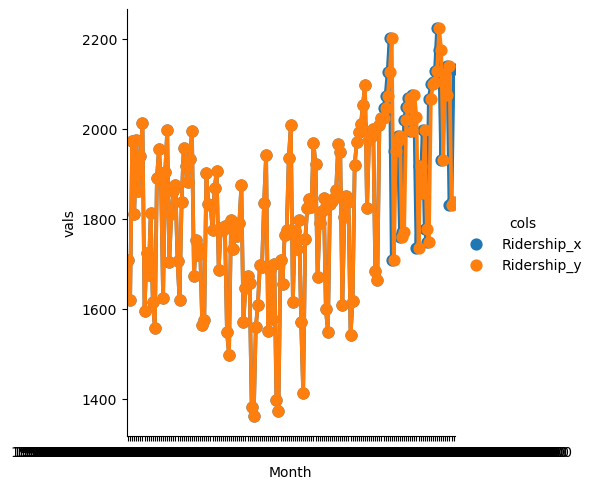

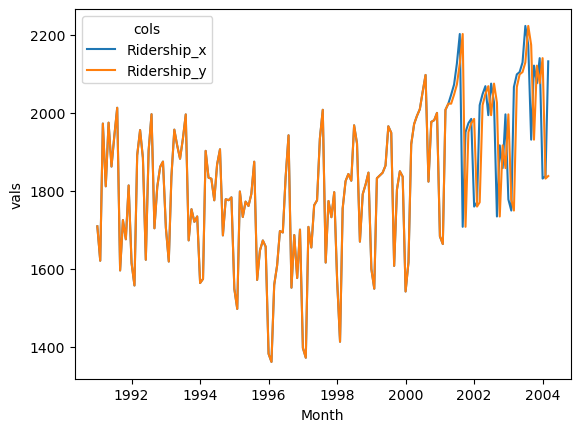

In [108]:
(2047.008-2023.792),(2072.913-2023.792)

(23.216000000000122, 49.121000000000095)

In [110]:
np.mean([(2047.008-2023.792),(2072.913-2023.792)])

36.16850000000011

In [104]:
naive_pred

2023.792

In [74]:
error

[0,
 23.216000000000122,
 25.904999999999973,
 53.80400000000009,
 75.92099999999982,
 -494.94499999999994,
 243.0229999999999,
 22.89800000000014,
 11.115000000000009,
 -225.10000000000014,
 10.966000000000122,
 249.317,
 28.486000000000104,
 20.36499999999978,
 -74.49599999999987,
 80.99099999999976,
 -48.697999999999865,
 -292.405,
 182.61599999999999,
 -58.42599999999993,
 138.00700000000006,
 -218.3190000000002,
 -28.54399999999987,
 316.97699999999986,
 32.43299999999999,
 6.012000000000171,
 24.759999999999764,
 93.67800000000034,
 -48.98900000000003,
 -242.95400000000018,
 190.06399999999985,
 -45.41599999999971,
 64.62300000000005,
 -309.1690000000001,
 6.498000000000047,
 294.4399999999998]

In [65]:
df_train.tail()

,Month,Ridership
152,2003-09-01,1931.406
153,2003-10-01,2121.470
154,2003-11-01,2076.054
155,2003-12-01,2140.677
156,2004-01-01,1831.508


In [66]:
df_valid.head()

,Month,Ridership
158,2004-03-01,2132.446


In [59]:
2007.928-2047.008

-39.07999999999993

In [60]:
error

39.07999999999993